In [1]:
import pandas as pd

# Carregar os dados
df = pd.read_parquet("C:/Users/lagma/Desktop/projetos/machine-learning/data/dados_clones.parquet")

# Mostrar o conteúdo do dataframe
df



,p2o_master_id,Massa(em kilos),General Jedi encarregado,Estatura(cm),Distância Ombro a ombro,Tamanho do crânio,Tamanho dos pés,Tempo de existência(em meses),Status
0,10578986,83.13,Yoda,180.25,Tipo 4,Tipo 1,Tipo 5,0.0,Defeituoso
1,10976676,83.08,Yoda,180.39,Tipo 3,Tipo 2,Tipo 5,0.0,Defeituoso
2,10588329,83.12,Shaak Ti,180.26,Tipo 4,Tipo 5,Tipo 5,0.0,Defeituoso
3,10254411,83.38,Shaak Ti,180.35,Tipo 2,Tipo 2,Tipo 5,0.0,Defeituoso
4,10634458,83.15,Shaak Ti,180.31,Tipo 3,Tipo 2,Tipo 2,0.0,Defeituoso
...,...,...,...,...,...,...,...,...,...
1048714,10230117,84.14,Yoda,181.03,Tipo 2,Tipo 1,Tipo 2,51.3,Apto
1048715,10230118,83.10,Yoda,180.62,Tipo 2,Tipo 1,Tipo 3,3.3,Apto
1048716,10230119,83.63,Obi-Wan Kenobi,180.54,Tipo 5,Tipo 2,Tipo 5,40.1,Apto
1048717,10230120,83.02,Shaak Ti,180.06,Tipo 1,Tipo 4,Tipo 1,11.2,Apto


In [2]:
## Como podemos descobrir onde está o problema?
# <Estatística descritiva>

df.groupby(["Status "])[['Estatura(cm)', 'Massa(em kilos)']].mean()

,Estatura(cm),Massa(em kilos)
Status,,
Apto,180.605545,83.765887
Defeituoso,180.400186,83.200134


In [3]:
df['Status_bool'] = df['Status '] == 'Apto'
df

,p2o_master_id,Massa(em kilos),General Jedi encarregado,Estatura(cm),Distância Ombro a ombro,Tamanho do crânio,Tamanho dos pés,Tempo de existência(em meses),Status,Status_bool
0,10578986,83.13,Yoda,180.25,Tipo 4,Tipo 1,Tipo 5,0.0,Defeituoso,False
1,10976676,83.08,Yoda,180.39,Tipo 3,Tipo 2,Tipo 5,0.0,Defeituoso,False
2,10588329,83.12,Shaak Ti,180.26,Tipo 4,Tipo 5,Tipo 5,0.0,Defeituoso,False
3,10254411,83.38,Shaak Ti,180.35,Tipo 2,Tipo 2,Tipo 5,0.0,Defeituoso,False
4,10634458,83.15,Shaak Ti,180.31,Tipo 3,Tipo 2,Tipo 2,0.0,Defeituoso,False
...,...,...,...,...,...,...,...,...,...,...
1048714,10230117,84.14,Yoda,181.03,Tipo 2,Tipo 1,Tipo 2,51.3,Apto,True
1048715,10230118,83.10,Yoda,180.62,Tipo 2,Tipo 1,Tipo 3,3.3,Apto,True
1048716,10230119,83.63,Obi-Wan Kenobi,180.54,Tipo 5,Tipo 2,Tipo 5,40.1,Apto,True
1048717,10230120,83.02,Shaak Ti,180.06,Tipo 1,Tipo 4,Tipo 1,11.2,Apto,True


In [4]:
df.groupby(["Distância Ombro a ombro"])['Status_bool'].mean()

Distância Ombro a ombro
Tipo 1    0.894749
Tipo 2    0.894665
Tipo 3    0.894456
Tipo 4    0.895459
Tipo 5    0.893713
Name: Status_bool, dtype: float64

In [5]:
df.groupby(["Tamanho do crânio"])['Status_bool'].mean()

Tamanho do crânio
Tipo 1    0.894355
Tipo 2    0.895701
Tipo 3    0.895072
Tipo 4    0.893433
Tipo 5    0.894483
Name: Status_bool, dtype: float64

In [6]:
df.groupby(["Tamanho dos pés"])['Status_bool'].mean()

Tamanho dos pés
Tipo 1    0.894781
Tipo 2    0.894215
Tipo 3    0.894962
Tipo 4    0.894309
Tipo 5    0.894775
Name: Status_bool, dtype: float64

In [7]:
df.groupby(["General Jedi encarregado"])['Status_bool'].mean()

General Jedi encarregado
Aayla Secura      1.000000
Mace Windu        1.000000
Obi-Wan Kenobi    1.000000
Shaak Ti          0.765018
Yoda              0.764945
Name: Status_bool, dtype: float64

In [8]:
features = [
    "Estatura(cm)",
    "Massa(em kilos)",
    "Distância Ombro a ombro",
    "Tamanho do crânio",
    "Tamanho dos pés",
]

cat_features = ["Distância Ombro a ombro",
                "Tamanho do crânio",
                "Tamanho dos pés"]

X = df[features]

In [9]:
# Transformação de categorias para Numérico
from feature_engine import encoding
onehot = encoding.OneHotEncoder(variables=cat_features)
onehot.fit(X)
X = onehot.transform(X)
X

,Estatura(cm),Massa(em kilos),Distância Ombro a ombro_Tipo 4,Distância Ombro a ombro_Tipo 3,Distância Ombro a ombro_Tipo 2,Distância Ombro a ombro_Tipo 1,Distância Ombro a ombro_Tipo 5,Tamanho do crânio_Tipo 1,Tamanho do crânio_Tipo 2,Tamanho do crânio_Tipo 5,Tamanho do crânio_Tipo 3,Tamanho do crânio_Tipo 4,Tamanho dos pés_Tipo 5,Tamanho dos pés_Tipo 2,Tamanho dos pés_Tipo 1,Tamanho dos pés_Tipo 3,Tamanho dos pés_Tipo 4
0,180.25,83.13,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,180.39,83.08,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,180.26,83.12,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,180.35,83.38,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,180.31,83.15,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048714,181.03,84.14,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
1048715,180.62,83.10,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1048716,180.54,83.63,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1048717,180.06,83.02,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [11]:

from sklearn import tree
arvore = tree.DecisionTreeClassifier(max_depth=3)
arvore.fit(X, df["Status "])



DecisionTreeClassifier(max_depth=3)

[Text(0.6666666666666666, 0.875, 'Massa(em kilos) <= 83.405\ngini = 0.189\nsamples = 1048719\nvalue = [938193, 110526]\nclass = Apto'),
 Text(0.5, 0.625, 'Estatura(cm) <= 180.555\ngini = 0.436\nsamples = 344571\nvalue = [234045, 110526]\nclass = Apto'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'Estatura(cm) <= 180.245\ngini = 0.497\nsamples = 205177\nvalue = [94651, 110526]\nclass = Defeituoso'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 53107\nvalue = [53107, 0]\nclass = Apto'),
 Text(0.5, 0.125, 'gini = 0.397\nsamples = 152070\nvalue = [41544, 110526]\nclass = Defeituoso'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 139394\nvalue = [139394, 0]\nclass = Apto'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 704148\nvalue = [704148, 0]\nclass = Apto'),
 Text(0.75, 0.75, '  False')]

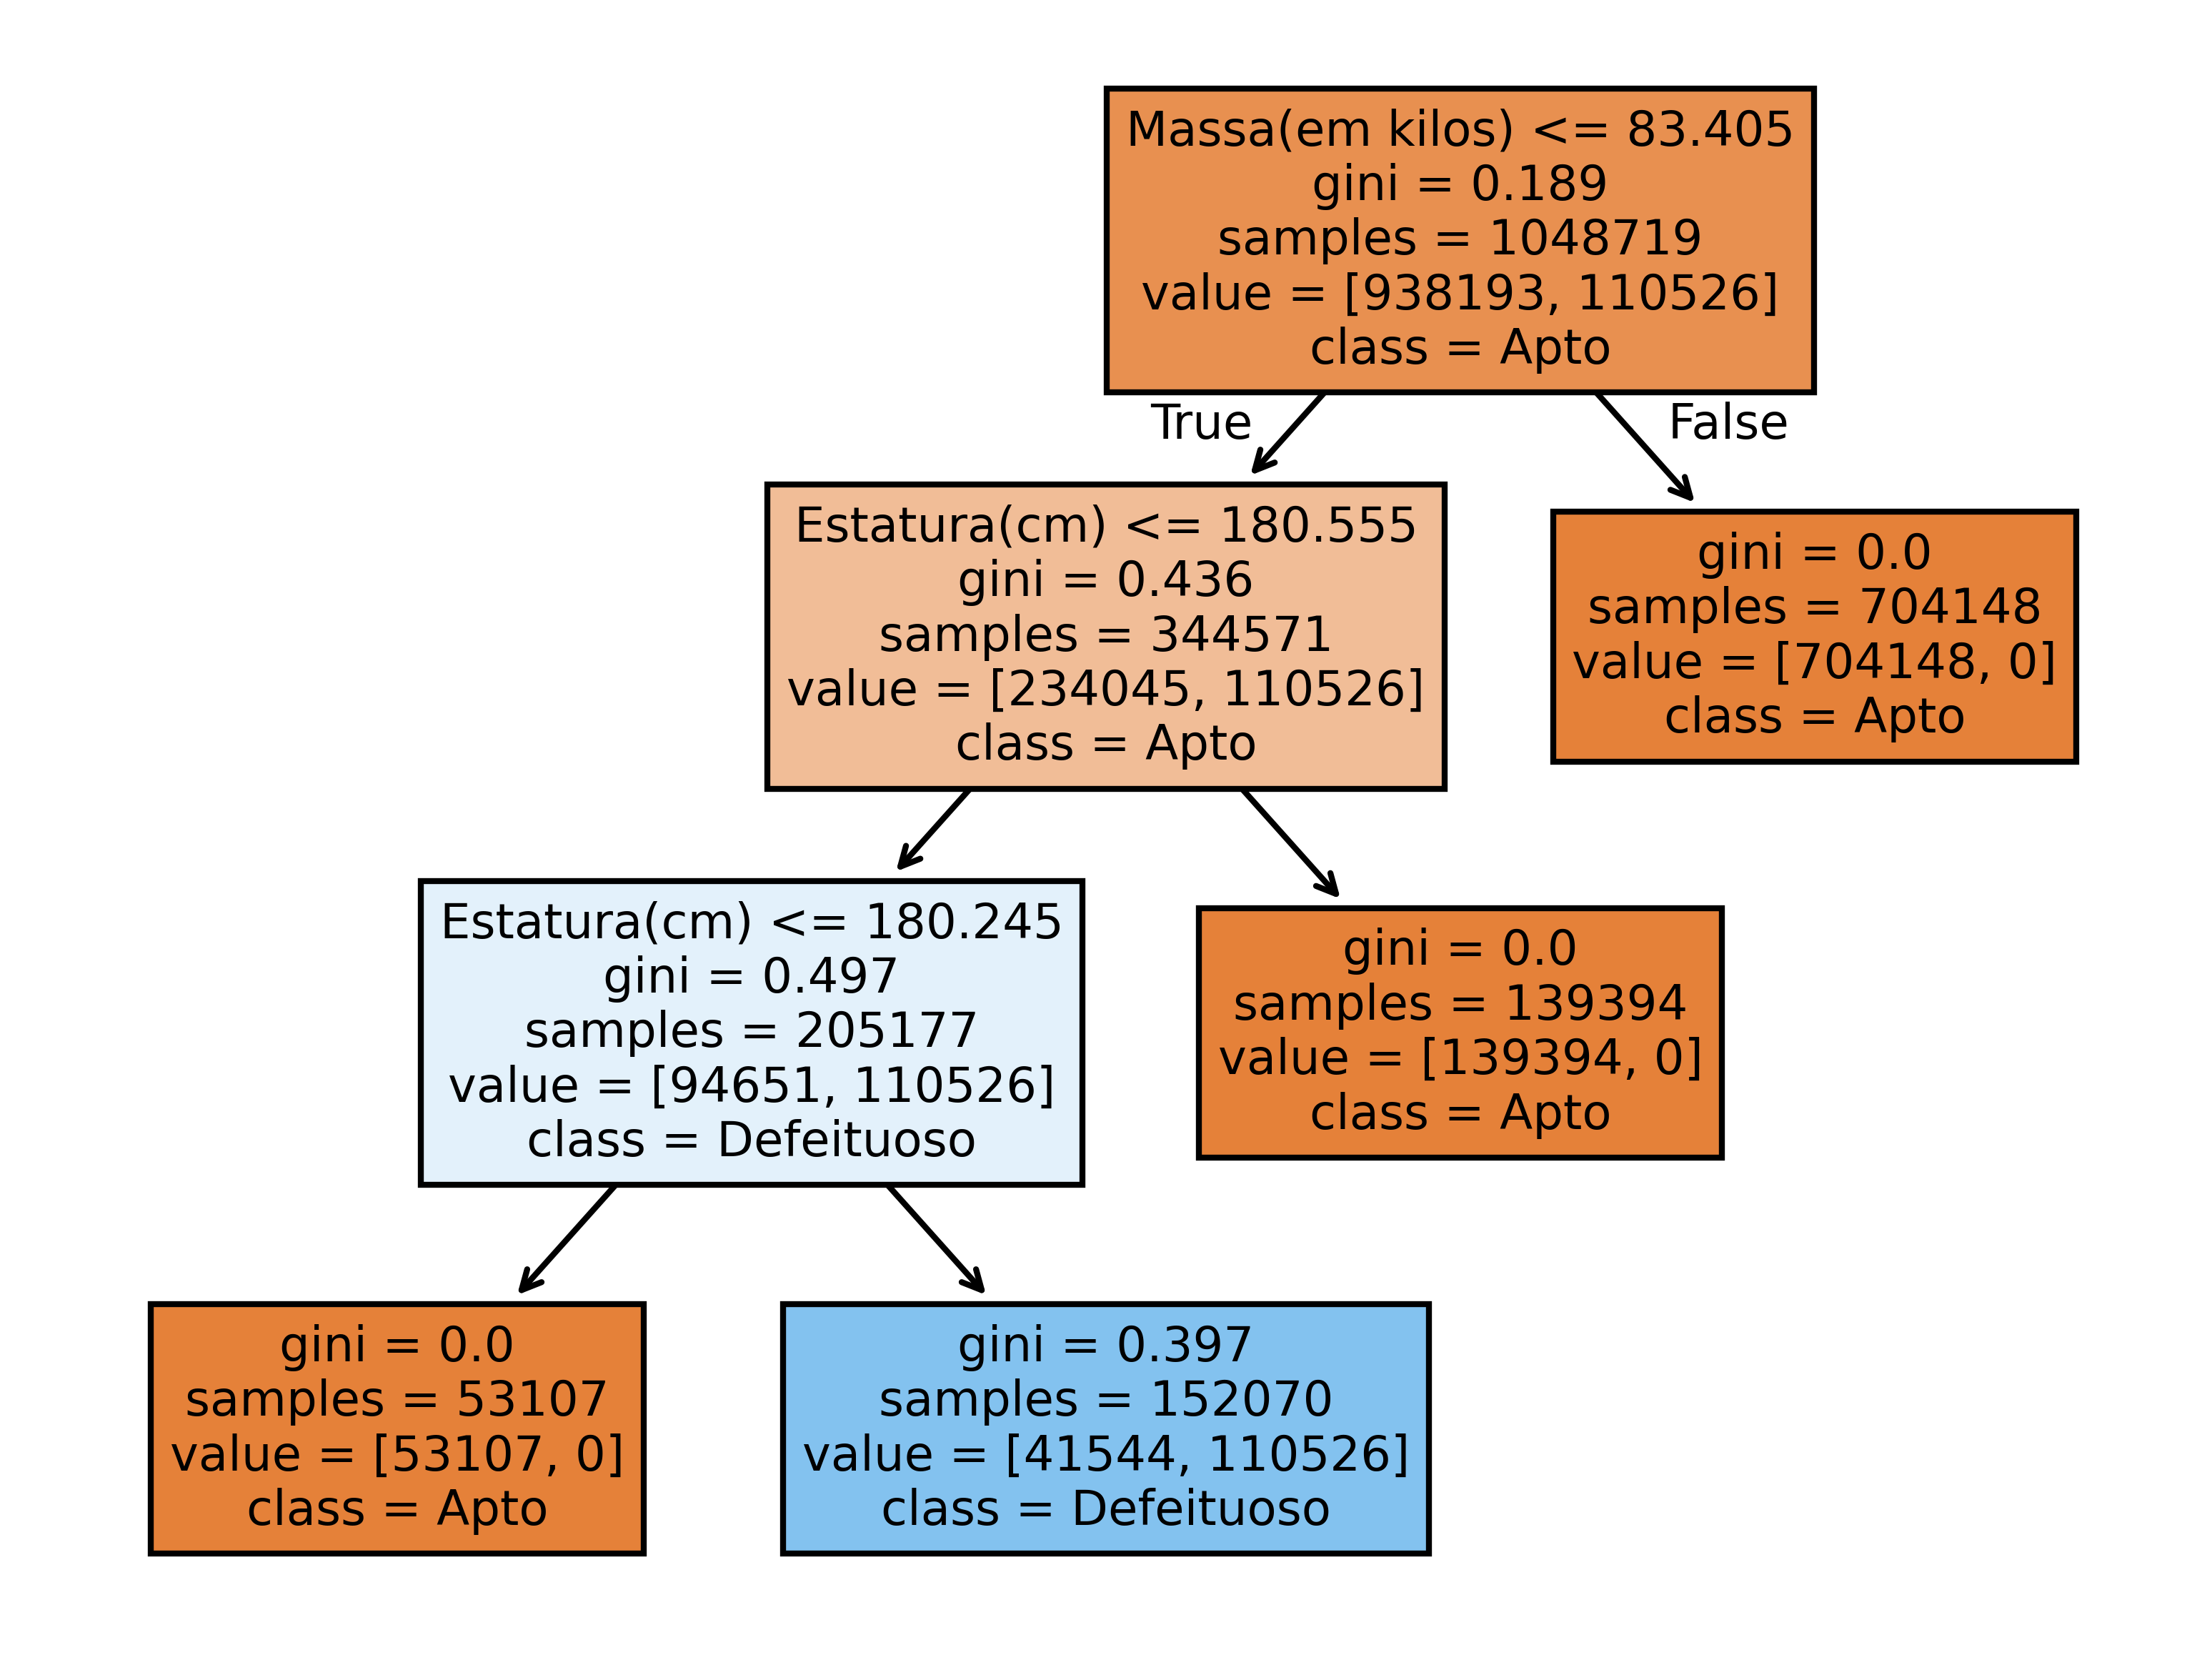

In [12]:
import matplotlib.pyplot as plt
plt.figure(dpi=600)
tree.plot_tree(arvore,
               class_names=arvore.classes_,
               feature_names=X.columns,
               filled=True,
               )
